In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/



### **Tarea 1: Combinar 12 meses de ventas en un solo archivo csv**


In [ ]:
# Probemos leyendo un archivo que corresponde a un mes de ventas
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Análisis de Ventas/Sales_Data/Sales_April_2019.csv")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
import os

files = [file for file in os.listdir('/content/drive/My Drive/Colab Notebooks/Análisis de Ventas/Sales_Data/')]

for file in files:
  print(file)

Sales_February_2019.csv
Sales_November_2019.csv
Sales_July_2019.csv
Sales_August_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_December_2019.csv
Sales_September_2019.csv
Sales_May_2019.csv
Sales_October_2019.csv


In [ ]:
# Unimos varios dataframes en un solo csv

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Análisis de Ventas/Sales_Data/' + file)
  all_months_data = pd.concat([all_months_data, df])

In [ ]:
all_months_data.to_csv('/content/drive/My Drive/Colab Notebooks/Análisis de Ventas/all_data.csv', index=False)

In [ ]:
# Leemos el nuevo dataframe que contiene todos los meses de venta

all_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Análisis de Ventas/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [ ]:
# Exploramos de manera general los datos

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### **Hacemos una limpieza de datos**

In [ ]:
# Encontrar NAN's
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# Quitar filas con NAN's
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [ ]:
# Encontrar 'Or' dentro de la columna 'Order Date' y eliminar las filas que lo tengan,
# debido a un error al tratar de convertir los valores a int

temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1904,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2225,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3091,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [ ]:
# Convertimos las columnas al tipo de dato correcto para la Tarea 3

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### **Tarea 2: Añadir una nueva columna con los meses**

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


### **Tarea 3: Añadir una nueva columna con las ventas totales por compra**

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68


In [ ]:
# Ponemos en orden las columnas y movemos la de las ventas totales

cols = list(all_data.columns.values)
all_data = all_data[cols[0:4] + [cols[-1]] + cols[4:7]]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,150502,iPhone,1,700.00,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,7.68,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


#### **Tarea 4: Añadir una columna con las ciudades**

In [ ]:
# Usamos la función .apply() para extraer la ciudad de la columna 'Purchase Address'

## def get_city(address):
##     return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,150502,iPhone,1,700.00,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,7.68,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA)


### **Pregunta 1: ¿Cuál fue el mejor mes de ventas? ¿Cuánto se ganó en ese mes?**

In [ ]:
results = all_data.groupby('Month').sum()

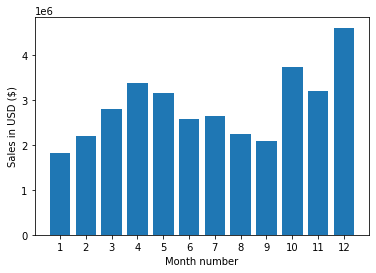

In [ ]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### **Pregunta 2: ¿Qué ciudad tuvo más ventas?**

In [ ]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


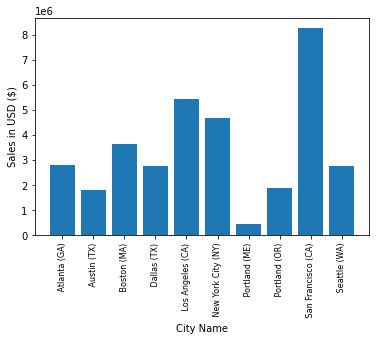

In [ ]:
cities  = [city for city, df in all_data.groupby('City')] ## No usamos la función .unique() porque quita el orden de las ciudades con las ventas

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

### **Pregunta 3: ¿A qué hora del día deberíamos mostrar anuncios para maximizar las probabilidades de compra por parte de los clientes**

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,150502,iPhone,1,700.00,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,7.68,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA)


In [ ]:
## Convertimos los datos de la columna 'Order Date' en un objeto *datetime* y extraemos los datos para hacer nuevas columnas

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,150502,iPhone,1,700.00,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,Portland (ME),1,35
1,150503,AA Batteries (4-pack),1,3.84,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA),7,24
2,150504,27in 4K Gaming Monitor,1,389.99,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,New York City (NY),9,46
3,150505,Lightning Charging Cable,1,14.95,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA),16,47
4,150506,AA Batteries (4-pack),2,3.84,7.68,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA),20,32


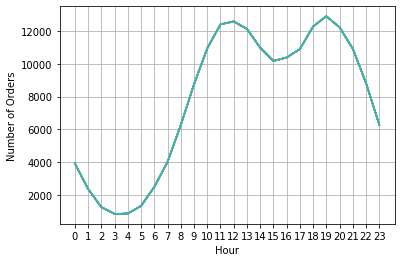

In [ ]:
hours  = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# Mi recomendación sería alrededor de las 11am ó 7pm

#### Podemos ver también la mejor para anunciar prodcutos y tener más ventas en la ciudad de Portland (OR)

In [ ]:
oregon = all_data[all_data['City'] == ' Portland (OR)']
oregon.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
40,150541,AAA Batteries (4-pack),1,2.99,2.99,2019-03-01 01:03:00,"683 Adams St, Portland, OR 97035",3,Portland (OR),1,3
54,150555,27in FHD Monitor,1,149.99,149.99,2019-02-18 11:27:00,"714 Adams St, Portland, OR 97035",2,Portland (OR),11,27
73,150574,Lightning Charging Cable,1,14.95,14.95,2019-02-17 19:51:00,"25 7th St, Portland, OR 97035",2,Portland (OR),19,51
93,150591,AAA Batteries (4-pack),1,2.99,2.99,2019-02-12 15:29:00,"362 Main St, Portland, OR 97035",2,Portland (OR),15,29
113,150611,AAA Batteries (4-pack),1,2.99,2.99,2019-02-04 16:49:00,"961 5th St, Portland, OR 97035",2,Portland (OR),16,49


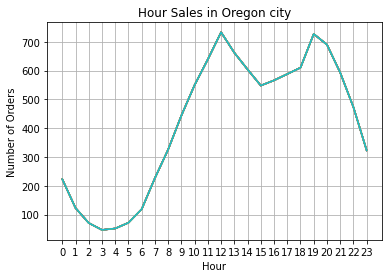

In [ ]:
hours  = [hour for hour, df in oregon.groupby('Hour')]

plt.plot(hours, oregon.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Hour Sales in Oregon city')
plt.grid()
plt.show()

### **Pregunta 4: ¿Qué productos se venden juntos con mayor frecuencia?**

In [ ]:
## Si dos productos tienen el mismo ID del pedido --> se compraron juntos

df = all_data[all_data['Order ID'].duplicated(keep=False)] # keep=False para mantener todos los datos duplicados
df.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
16,150518,Macbook Pro Laptop,1,1700.00,1700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2,San Francisco (CA),12,38
17,150518,iPhone,1,700.00,700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2,San Francisco (CA),12,38
82,150582,iPhone,1,700.00,700.00,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2,Seattle (WA),23,38
83,150582,Lightning Charging Cable,1,14.95,14.95,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2,Seattle (WA),23,38
91,150590,Apple Airpods Headphones,1,150.00,150.00,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",2,San Francisco (CA),9,35
92,150590,AAA Batteries (4-pack),1,2.99,2.99,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",2,San Francisco (CA),9,35
119,150617,Google Phone,1,600.00,600.00,2019-02-25 00:02:00,"551 Sunset St, New York City, NY 10001",2,New York City (NY),0,2
120,150617,USB-C Charging Cable,1,11.95,11.95,2019-02-25 00:02:00,"551 Sunset St, New York City, NY 10001",2,New York City (NY),0,2
154,150651,Google Phone,1,600.00,600.00,2019-02-02 11:49:00,"525 10th St, New York City, NY 10001",2,New York City (NY),11,49
155,150651,USB-C Charging Cable,1,11.95,11.95,2019-02-02 11:49:00,"525 10th St, New York City, NY 10001",2,New York City (NY),11,49


In [ ]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"


In [ ]:
# Referencia: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### **Pregunta 5: ¿Qué producto se vendió más? ¿Por qué crees que sea así?**

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,150502,iPhone,1,700.00,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,Portland (ME),1,35
1,150503,AA Batteries (4-pack),1,3.84,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA),7,24
2,150504,27in 4K Gaming Monitor,1,389.99,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,New York City (NY),9,46
3,150505,Lightning Charging Cable,1,14.95,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA),16,47
4,150506,AA Batteries (4-pack),2,3.84,7.68,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA),20,32


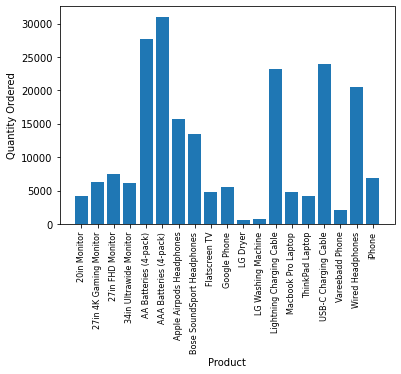

In [ ]:
## Hacemos un .groupby() de cada prodcuto y le añadimos la función de suma en la cantidad solicitada
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

product  = [product for product, df in product_group]

plt.bar(product, quantity_ordered)
plt.xticks(product, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()


##### Los dos productos más vendidos son las baterías AA y AAA. Puede ser porque son los productos más baratos, en comparación con una secadora LG que es mucho más cara. 

##### Para comprobar esto decidimos sobreponer una nueva gráfica sobre la original que comparara los precios de cada producto con la cantidad vendida, y de esta manera ver si hay una correlación positiva entre ambas variables.

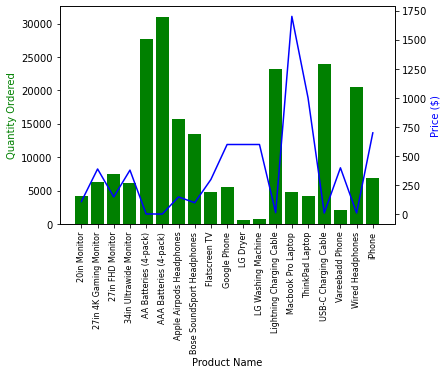

In [ ]:
prices = all_data.groupby('Product').median()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color='g')
ax2.plot(product, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)

fig.show()